### Why this problem is important?
Optimizing an advertising budget allows us to get the most out of our money. Imagine we have a budget of $\$1000$ and we want to get as much reach and sales as possible with that money, but we have three different channels: TV, Radio or Newspaper. How should we allocate our money on each marketing channel such that we maximize the outcome? 

The answer would allow us to avoid crowding on a single channel where we put everything into a single basket but spreading it out to best performing channels. A quality budget optimization strategy can significantly improve the effectiveness of search advertising campaigns, thus helping advertisers to succeed in the fierce competition of online marketing.

Linear programming (LP) is one of the most widely used optimization technique to obtain the best outcome. An excerpt from the book “Linear and Nonlinear Programming” by David G. Luenberger:
> A linear programming problem is characterized, as the name implies, by linear functions of the unknowns; the objective is linear in the unknowns, and the constraints are linear equalities or linear inequalities in the unknowns.

In this example, our budget constraint restricting the total amount of money to be allocated among three different channels (TV, Radio and Newspaper), the budget constraint takes the mathematical form $c(x1, x2, x3) := x1 + x2 + x3 ≤ B$, where $B$ is the budget. The total spend for TV should be less than $\$400$, Radio should be less than $\$500$ and Newspaper should be less than $\$300$. While total budget is capped at $\$1000$.

For this project, we will use the open source advertising dataset from [Kaggle](https://www.kaggle.com/datasets/ashydv/advertising-dataset).

### Setting up

In [57]:
import pandas as pd
import seaborn as sns
from pulp import LpProblem, LpMaximize, LpVariable, LpStatus
from sklearn.linear_model import LinearRegression

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [58]:
features_c = ['TV', 'Radio', 'Newspaper']
target_c = 'Sales'
df = pd.read_csv('../data/advertising.csv')

X = df[features_c]
y = df[target_c]

df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### Visualization

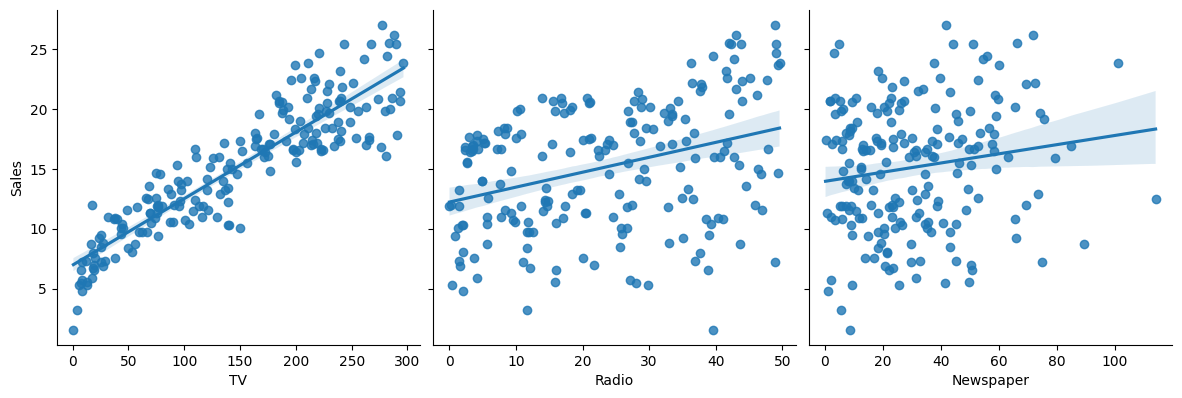

In [59]:
sns.pairplot(df, x_vars=features_c, y_vars=target_c, size = 4, aspect = 1, kind='reg')

### Optimizing with Linear Programming

In [60]:
prob = LpProblem("Ads Sales Problem", LpMaximize)

tv = LpVariable("TV", 0, 400) # TV <= 400
rad = LpVariable("Radio", 0, 500) # Radio <= 500
news = LpVariable("Newspaper", 0, 300) # Newspaper <= 300
prob += tv + rad + news <= 1000   # Should be less than $1000

#### Building our objective function
The objective function will capture the information from the advertising dataset, making the relationship between
the three amounts invested in each channel and the total sales.

By maximizing the **objective function** (that returns an expected value for *Sales*) in our PL problem, we will achieve the goal of making the most of the money invested.

In [61]:
lr = LinearRegression()
lmodel = lr.fit(X, y)
lcoef = lmodel.coef_
lintercept = model.intercept_

def objective_func(tv, rad, news):
    return lcoef.item(0) * tv + lcoef.item(1) * rad + lcoef.item(2) * news + lintercept

In [62]:
prob += objective_func(tv, rad, news)
status = prob.solve()
print(f'Status: {LpStatus[status]}')

Status: Optimal


In [63]:
for v in prob.variables():
    print(f'{v.name}: ${v.varValue}')

print(f'Objective Function(tv, rad, news) = {prob.objective.value()}')

Newspaper: $100.0
Radio: $500.0
TV: $400.0
Objective Function(tv, rad, news) = 79.93761612542154
